Starting simulation at t=0. s for a duration of 50. ms
50. ms (100%) simulated in 1s
Starting simulation at t=53. ms for a duration of 50. ms
50. ms (100%) simulated in 1s


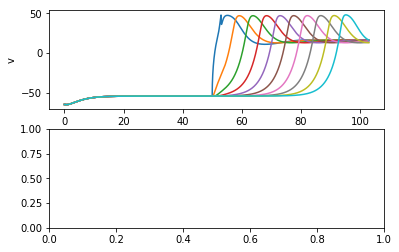

In [36]:
from brian2 import *
from scipy import stats

defaultclock.dt = 0.01*ms

morpho = Cylinder(length=10*cm, diameter=2*238*um, n=1, type='axon')

El = -54.4*mV
ENa = 50*mV
EK = -77*mV
gl = 0.3*msiemens/cm**2
gNa0 = 120*msiemens/cm**2
gK = 36*msiemens/cm**2
Cm = 1*uF/cm**2
Vrep = -65*mV

#pulse shape
pulse_up = 50*ms
pulse_duration = 3*ms
pulse_down = 50*ms
I_app = 10*uA
# Typical equations
eqs = '''
# The same equations for the whole neuron, but possibly different parameter values
# distributed transmembrane current
Im = gl * (El-v) + gNa * m**3 * h * (ENa-v) + gK * n**4 * (EK-v) : amp/meter**2
I : amp (point current) # applied current
dm/dt = alpham * (1-m) - betam * m : 1
dn/dt = alphan * (1-n) - betan * n : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (0.1/mV) * (-v+40*mV) / (exp((-v+40*mV) / (10*mV)) - 1)/ms : Hz
betam = 4 * exp((-v-65*mV)/(18*mV))/ms : Hz
alphah = 0.07 * exp((-v-65*mV)/(20*mV))/ms : Hz
betah = 1/(exp((-v+35*mV) / (10*mV)) + 1)/ms : Hz
alphan = (0.01/mV) * (-v+55*mV) / (exp((-v+55*mV) / (10*mV)) - 1)/ms : Hz
betan = 0.125*exp((-v-65*mV)/(80*mV))/ms : Hz
gNa : siemens/meter**2
'''

neuron = SpatialNeuron(morphology=morpho, model=eqs, method="exponential_euler",
                       refractory="m > 0.4", threshold="m > 0.5", 
                       Cm=Cm, Ri=35.4*ohm*cm)
neuron.v = Vrep
neuron.h = 0.6
neuron.m = 0.05
neuron.n = 0.32
neuron.I = 0*amp
neuron.gNa = gNa0
M = StateMonitor(neuron, 'v', record=True)
spikes = SpikeMonitor(neuron)

run(pulse_up, report='text')
neuron.I[0] = I_app # current injection at one end
run(pulse_duration)
neuron.I = 0*amp
run(pulse_down, report='text')

# Calculation of velocity
# slope, intercept, r_value, p_value, std_err = stats.linregress(spikes.t/second,
#                                                 neuron.distance[spikes.i]/meter)
# print("Velocity = %.2f m/s" % slope)

subplot(211)
for i in range(10):
    plot(M.t/ms, M.v.T[:, i*100]/mV)
ylabel('v')
subplot(212)
# plot(spikes.t/ms, spikes.i*neuron.length[0]/cm, '.k')
# plot(spikes.t/ms, (intercept+slope*(spikes.t/second))/cm, 'r')
# xlabel('Time (ms)')
# ylabel('Position (cm)')
show()
